Total comments  159571
Total clean comments  143346
                      id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5       00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7       00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8       00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9       00040093b2687caa  alignment on this subject and which are contra...   
10      0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   


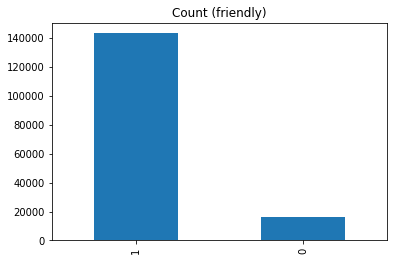

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


df_train = pd.read_csv("train.csv")

friendly = df_train.iloc[:,2:].sum(axis = 1)

df_train['friendly'] = (friendly == 0)
print ("Total comments ", len(df_train))
print ("Total clean comments ", df_train['friendly'].sum())

df_train['friendly'] = df_train['friendly'].astype(int)

print(df_train)

friendly_count = df_train.friendly.value_counts()
print('Class 0:', friendly_count[0])
print('Class 1:', friendly_count[1])
print('Proportion:', round(friendly_count[0] / friendly_count[1], 2), ': 1')

friendly_count.plot(kind='bar', title='Count (friendly)')

plt.show()

In [9]:
# Class count
count_class_0, count_class_1 = df_train.friendly.value_counts()

# Divide by class
df_class_0 = df_train[df_train['friendly'] == 0]
df_class_1 = df_train[df_train['friendly'] == 1]

Random under-sampling:
1    143346
0     16225
Name: friendly, dtype: int64


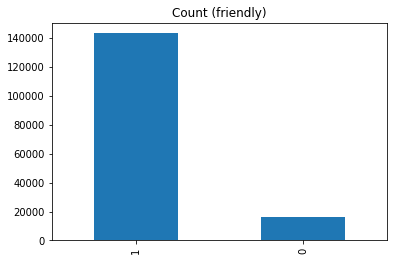

In [11]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.friendly.value_counts())

df_test_under.friendly.value_counts().plot(kind='bar', title='Count (friendly)')

plt.show()

Random over-sampling:
1    143346
0     16225
Name: friendly, dtype: int64


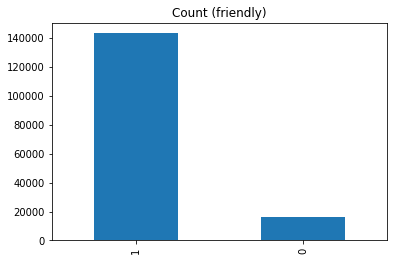

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.friendly.value_counts())

df_test_over.friendly.value_counts().plot(kind='bar', title='Count (friendly)')

plt.show()